# Teoría de Milankovitch

En 1930, Milankovitch desarrolló una teoría astronómica que describe el clima del pasado (o paleoclima), basándose en ciertos parámetros orbitales de la Tierra en su movimiento alrededor del Sol. Estos parámetros varían cíclicamente, que al convinarse, originan cambios en la insolación de la superficie terrestre, y por tanto, en su temperatura. Estos parámetros son: la excentricidad de la orbita terrestre, la oblicuidad del eje de rotación de la Tierra y su precesión.


La insolación instantánea recibida por unidad de área está dada por:

$$ I=S_0 \bigg (\frac{a}{r} \bigg )^2 cos \theta_z,$$

donde $a$ es el radio real de la orbita terrestre,  $r$ es el radio promedio, $S_0 = 1370 W m^{-2}$, es la constante solar promedio (a la distancia $r$), que incide perpendicularmente a la superficie terrestre, $\theta_z$ es el ángulo zenital que es formado entre el zenit y la inclinación del Sol, $\phi$ es la latitud y $\delta$ es la declinación, la cual varía varía entre $[-23.5º, 23.5º]$.

De acuerdo con la ley de coseno de Lambert, se puede expresar $\theta_z$ en términos de $\phi$, $\delta$ y $\lambda$, que es el día del año medido en grados.

$$cos\theta_z = sin \phi\ sin \delta + cos\phi\ cos\delta\ cosH.$$

También se pueder expresar la declinación $\delta$ como:

$$sin \delta = sin \varepsilon\ sin \lambda,$$

donde $\varepsilon$ es la inclinación en el eje de rotación terrestre.



La inclinación del eje de rotación y la traslación de la Tierra al rededor del Sol, hacen que la duración del día y de la noche cambien de acuerdo con la época del año y de la latitud. Esto es importante en el modelo, pues se busca conocer la insolación media diaria en todas las latitudes del planeta a lo largo del año. La insolación media diaria es la integral de la insolación en función de la latitud, la declinación y el ángulo horario $h$, sobre un medio día es decir la mitad de una vuelta completa de la Tierra sobre su propio eje.

$$I_d = \frac{1}{H} \int_{o}^{H} I(\phi, \delta, h) dh,$$


$$I_d = \frac{1}{\pi} \int_{o}^{H} S_0 \bigg (\frac{a}{r} \bigg )^2 cos \theta_z dh.$$

Sustituyendo $cos \theta_z$ en la anterior ecuación, se tiene:

$$I_d = \frac{1}{\pi} \int_{o}^{H} S_0 \bigg (\frac{a}{r} \bigg )^2  ( sin\phi sin\delta + cos\phi cos\delta cosh) dh ,$$

$$I_d = \frac{1}{\pi} S_0 \bigg (\frac{a}{r} \bigg )^2  \big [H\ sin\phi sin\delta + cos\phi cos\delta sinH \big] .$$

Para poder usar la expresión anterior es necesario calcular la duracion del día para cada latitud con respecto del día del año, para esto se puede rescribir $H$ de la siguiente forma:

$$cos H = -tan \phi tan \delta.$$



La exentricidad de la órbita, se puede escribir como la ecuación de una elipse [Leutre]:

$$r = [a(1-e^2)]\times (1 + e\ cos \nu)^{-1},$$

de donde se puede despejar $\frac{a}{r}$:

$$ \frac{a}{r} = \frac{(1 + \epsilon\ cos \nu)}{(1-\epsilon^2)} = \rho$$

Dicho término es un factor que describe la excentricidad de la órbita terrestre y se lo puede renombrar con la letra $\rho$. La variable $\epsilon$ es la excentricidad de la orbita, cuyo valor actual es de $0.017$, pero oscila entre $\epsilon \simeq 0 $ y $\epsilon \simeq 0.07$, en un periodo de $100$ mil años , donde también se distingue una periodicidad cada $400$ mil años [Leutre]. Mientras que $\nu$ es la posición de la Tierra en su trayectoria por la órbita, medida desde el perihelio. Por tanto la ecuación a usar en un modelo numérico queda como:

$$I_d = \frac{1}{\pi} S_0 \rho^2  \big [H\ sin\phi sin\delta + cos\phi cos\delta sinH \big] .$$

El parámetro que describe la oblicuidad se tiene que calcular aparte. Este tiene un ciclo de 

La **función** que calcula la insolación para un día del año y una latitud es:

In [ ]:
function Milank_insolacion (ϕ_d, dia)
    ϕ = ϕ_d * pi/180
    t = (dia -90)*pi/180
    ϵ = 23.5 * pi/180
    S_0 = 1370
    ɛ = 0.017

  
    ρ = (1 + ɛ * cos(t)) / (1-ɛ^2)
    
    δ = asin(sin(ϵ)*sin(t))
    
    if abs(ϕ)>pi/2-abs(δ)
        Si = 0
        
        if ϕ*δ > 0
            
            Si = S_0 * ρ^2 * (sin(ϕ)*sin(δ))
            
        end
    
    else
        
        h0 = acos(-tan(ϕ)*tan(δ))
        Si = S_0/h0 * ρ^2 * (sin(ϕ)*sin(δ)*h0 + cos(ϕ)*cos(δ)*sin(h0))
        
    end
    
    Si
    
end

### Modelo numérico

Se busca generar una figura que muestre la distribución y la intensidad de la insolación media anual para cada latitud a lo largo de un año, para esto se requiere calcular la declinación y el ángulo horario para cada latitud en todo un año, lo malo es que la ecuación que se usa para calcular H, se indertermina a partir de los $\pm 66º$ (a estos se le conoce como circulos polares), ya que a partir de estas latitudes se deja de tener un amanecer y anochecer todos los días. Para poderr calcular la insolación en estas regiones, se puede poner los siguientes condicionales:

Si $|\phi|> \pi/ 2 - |\delta|$, entonces $I_d = 0$. Pero si al mismo tiempo se cumple que si $\phi \delta > 0$, entonces $I_d = \frac{1}{\pi} S_0 \rho^2  H\ sin\phi sin\delta$. 

````
       if abs(ϕ2[j]) > pi/2 - abs(d)
            
            I[j,i] = 0
            
            if (ϕ2[j])*d > 0
                
                I[j,i] = S_0*sin(ϕ2[j])*sin(d)
                
            end
            
        end
````

De esta forma es posible generar una figura para todas las latitudes.




In [2]:
using PyPlot

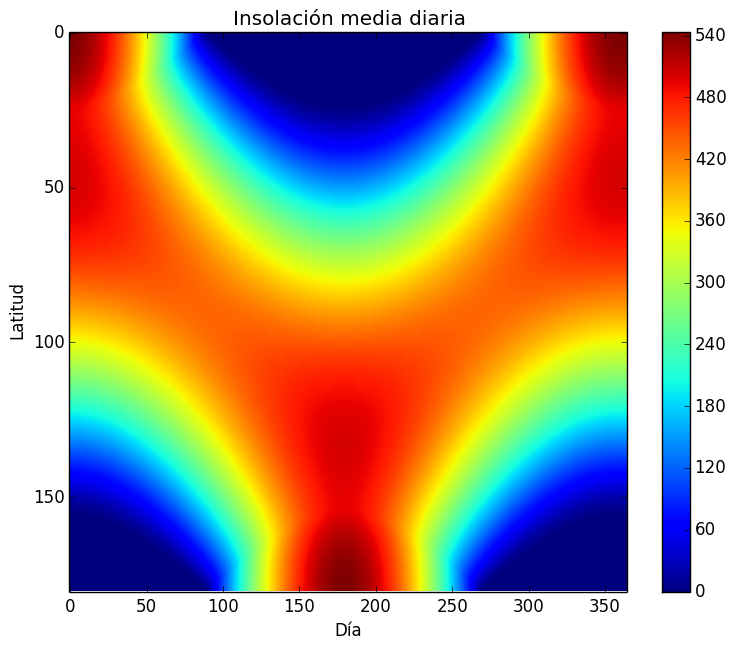

PyObject <matplotlib.text.Text object at 0x3e3084890>

In [19]:
ϕ2 = collect(-90:90)*pi/180
dias = collect(1:365)
I = zeros(length(ϕ2),length(dias))
S_0 = 1370

for j in 1:length(ϕ2)
    for i in 1:length(dias)
    
        d = asin(sin(23.4*pi/180)*sin((i-90)*pi/180))
        
   
        if abs(ϕ2[j])>pi/2-abs(d)
            
            I[j,i] = 0
            
            if (ϕ2[j])*d > 0
                
                I[j,i] = S_0*sin(ϕ2[j])*sin(d)
                
            end
            
        else
                
            h0 = acos(-tan(d)*tan(ϕ2[j]))
        
            I[j,i] = S_0/pi* (h0*sin(ϕ2[j])*sin(d) + cos(d)*cos(ϕ2[j])*sin(h0))
   
        end
       
            
    end
end

figure(figsize=(9,7))
imshow(I, aspect="auto")
colorbar()
xlabel("Día")
ylabel("Latitud")
legend()
title("Insolación media diaria")

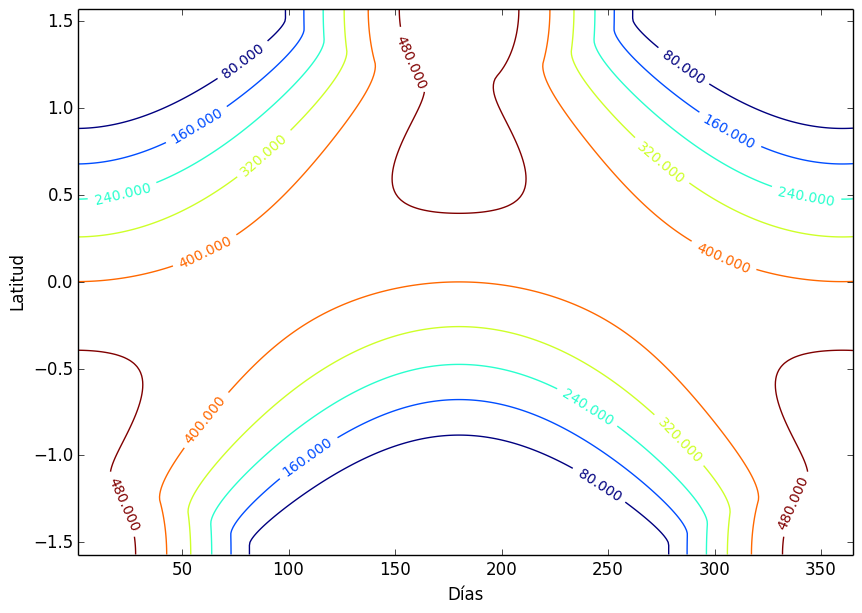

PyObject <matplotlib.text.Text object at 0x3e314b710>

In [18]:
fig = figure("Milankovitch", figsize=(10,15))
ax = fig[:add_subplot](2,1,2)
cp = ax[:contour](dias, ϕ2, I, Colors="red", linewidth=10.0)
ax[:clabel](cp, inline = 1, fontsize=10)
xlabel("Días")
ylabel("Latitud")

### Oblicuidad

La oblicuidad es la variación del eje de inclinación de la Tierra. Este varía de entre $22º$ a $24.5º$, en un periode de $40\ 000$ años, y su valor actual es de $23.4º$. Este parámetro se cambia haciendo variar la constante $\epsilon$ en el modelo.

- Aproximación polinomial que describe la variación de la oblicuidad en el periodo de $10\ 000$ años antes y después de la época actual es:

$$ \epsilon = 84381.448 - 46.815t - (6 \times 10^{-4})t^2 + (181 \times 10^{-5})t^3$$






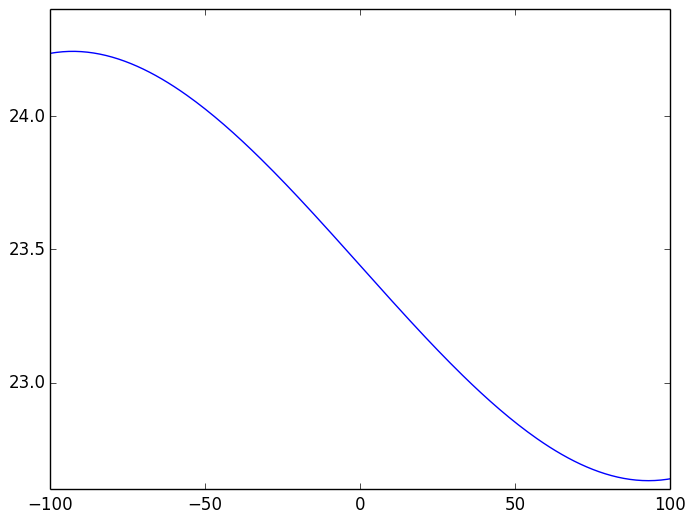

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31f6ddf10>

In [6]:
siglos = collect(-100:100)
oblicuidad = Any[]

for t in siglos
    
    ϵ = (84381.448 - 46.815*t - (6e-4)*t^2 + (181e-5)t^3)/3600
    push!(oblicuidad, ϵ)
    
end

plot(siglos, oblicuidad)

- Se puede obtener una aproximación más precisa usando una aproximación polinomial de orden diez:

$$\epsilon = 84381.448 - 46.815t - (6 \times 10^{-4})t^2 + (181 \times 10^{-5})t^3 - 51.38t^4 - 249.67t^5 - 39.05t^6+7.12t^7+27.87t^8+5.79t^9+2.45t^{10}$$

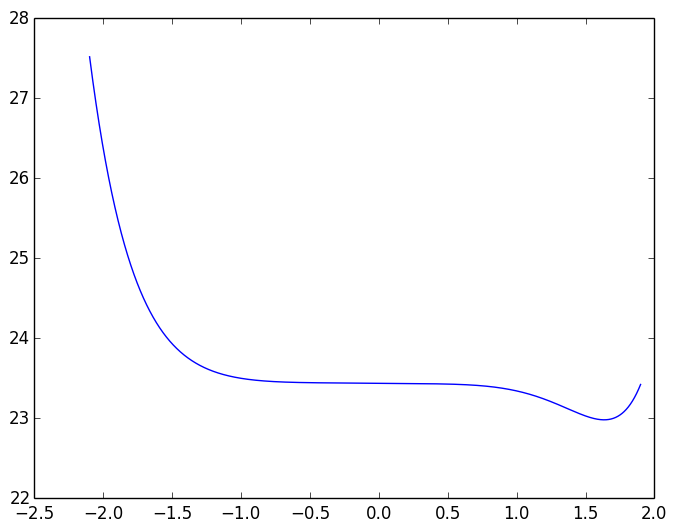

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31f77b590>

In [7]:
decadas = collect(-2.1:0.001:1.9-0.001)
oblicuidad_o10 = Any[]

for t in decadas
    
    ϵ = (84381.448 - 46.815*t - (6e-4)*t^2 + (181e-5)*t^3 - 51.38*t^4 - 249.67*t^5 
    - 39.05*t^6 + 7.12*t^7 + 27.87*t^8 + 5.79*t^9 + 2.45*t^10) /3600
    push!(oblicuidad_o10, ϵ)
    
end

plot(decadas,oblicuidad_o10)

**Aunque** Julio tiene en su código los siguientes valores: 
````
ϵ = (84381.448 - 4680.93*t - (1.55)*t^2 + (1999.25)t^3 - 51.38t^4 - 249.67t^5 - 39.05*t^6 + 7.12*t^7 + 27.87*t^8 + 5.79*t^9 + 2.45*t^10) /3600
````
que dan como resultado:

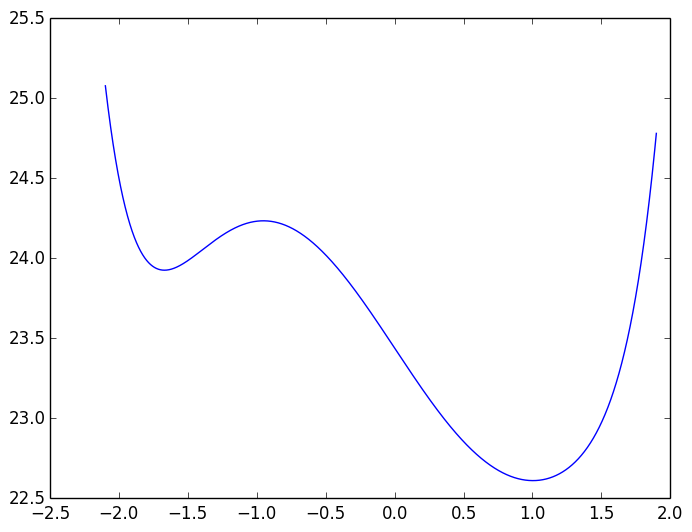

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31f991d10>

In [8]:
decadas = collect(-2.1:0.001:1.9-0.001)
oblicuidad_o10_julio = Any[]

for t in decadas
    
    ϵ = (84381.448 - 4680.93*t - (1.55)*t^2 + (1999.25)t^3 - 51.38t^4 - 249.67t^5 
    - 39.05*t^6 + 7.12*t^7 + 27.87*t^8 + 5.79*t^9 + 2.45*t^10) /3600
    push!(oblicuidad_o10_julio, ϵ)
    
end

plot(decadas,oblicuidad_o10_julio)

## Función y animación de Milankovitch

Ahora se hace una función que tome en cuenta las variaciones en la oblicuidad y la precesión.



Estas son **funciones que se ocupan para animar**.

In [9]:
using PyCall
@pyimport matplotlib.animation as anim  

In [10]:
function anima(edos, nombre::ASCIIString)
    fig = figure(figsize=(10,5))
    cuadros = [[imshow(edos[:,:,i], interpolation="none")] for i in 1:length(edos[1,1,:])]
    
    animacion = anim.ArtistAnimation(fig, cuadros, interval=200, blit=true) 
    animacion[:save](nombre*".mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
end

function anima_paso_50(edos, nombre::ASCIIString)
    fig = figure(figsize=(10,5))
    cuadros = [[imshow(edos[:,:,i], interpolation="none")] for i in 1:50:length(edos[1,1,:])]
    
    animacion = anim.ArtistAnimation(fig, cuadros, interval=200, blit=true) 
    animacion[:save](nombre*".mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
end

function muestra_animacion(nombre::ASCIIString)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",base64(open(readbytes,nombre*".mp4")),"""" type="video/mp4"></video>"""))
end

muestra_animacion (generic function with 1 method)

Para facilitarnos el proceso de animación se puede hacer una **función que calcule la distribución de insolación anual para todas las latitudes** y la guarde en una matriz de dos dimensiones.

In [11]:
function Milankovitch(oblic, precesion = 90)
    
    ϕ2 = collect(-90:90)*pi/180
    dias = collect(1:360)
    I = zeros(length(ϕ2),length(dias))
    S_0 = 1370
    ϵ = oblic*pi/180

    for j in 1:length(ϕ2)

        for i in 1:length(dias)

            d = asin(sin(ϵ)*sin((i-precesion)*pi/180))

            if abs(ϕ2[j])>pi/2-abs(d)
            
                I[j,i] = 0
            
                if (ϕ2[j])*d > 0
                
                    I[j,i] = S_0*sin(ϕ2[j])*sin(d)
                    
                end
            else
                      
                h0 = acos(-tan(d)*tan(ϕ2[j]))                  
                I[j,i] = S_0/pi* (h0*sin(ϕ2[j])*sin(d) + cos(d)*cos(ϕ2[j])*sin(h0))
   
            end    
        end

    end

    #figure(figsize=(9,7))
    #imshow(I, aspect="auto")
    #colorbar()
    #xlabel("Día")
    #ylabel("Latitud")
    #legend()
    #title("Insolación media diaria")
    
    I
end

Milankovitch (generic function with 2 methods)

Para animar se necesita generar una matriz de 3 dimensiones donde se guarden los datos.


**[1]** Se puede animar la precesión fijando la inclinación del eje en $23.4º$.

In [12]:
J = zeros(181, 360, 360)

for i in 1:360

    J[:,:,i] = Milankovitch(23.4, i)
    
end

#J

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAITgJtZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0NiByMjU1NSAwYzIxNDgwIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAFkzZYiEABT//vfHT8Cm6Plmy51FPSEwitj6SCi9WOzQMnUAAAMAAAMAAAMAAAMBXA0eTU9KZyQ0JAAAAwAAuYAHwBz1hZbk5gJof+jux9U10MlWsh9klFeOEMtMF+BHHZ+K68N3gyMSX9csFQeIRbIe29YAjOE3hbi8u3FUKHBQW1Qwv59N5dMrRUzQrP7+y4C04/0fJ7CSodOBa3W603v/h2+9aTrxMko+9dqImoOrW60UdxXNaNM0wjT629/xkaQJp3eBURq1GzraTvVxlDXL7DDLo6UryfsawyDTYsQLs+4QfRT2UmJX7n97Q9uAKXhjfXK7/ve+f0z1o4sTZ56Ku0X8v5SG35TrTZHmTzjiQBlrnz2uHZmEs9JjC8TzbX0KnvoY+IC5EJKGzkCJMtaxLems1fAJwDNfX8zr8S31WxFd891+6S9e4QhKRP2I9z/KCOio9EhXinx7AePyuYSxGIDklUG3UDquogwvhlw9oVL6J4xwQKm+bPRx0ZyDFucgm/cSnnPWcFo7UatVlDSDiEes3YVkS/WzWDLDTUP6pi38NZCDF7gK91/4FLcK7ODwsU02qMsec4McySUoKDicYZMBxdB8lcITpWd5n/3DXY1sxFB2EDaqyA5uD5WhvtpIiNJvdcgESIcieS2TEdBvuQSD0D99KFZ1wHq/6OlyqnZwMzx5xZQttt9bjc2UC/+uaPiewQ+ZMrNP/Nh/u+o6mzb8QV+B47O2WNr8WD2AP0S9VTxiqcQ+jaz6Z6cexzKGlFuStjY70ZsyIGcQXAdtPnQurwQO6HjTLkfv/t8zShGOeQuFPoNCdG7c+FjfXiQWLPkAJp+scXW7nHfcDQh4fsEc4nvrooruE8bmGg2z4Lknpb5fnhuxX5QHeTcn87pX8/+vI1lsPVTR7aUWqDQLOq11wqEGiaXahu+lLQmTqXylsmuN+ObF5Le10iS9lT1l86A4V8/T7IoCm20ZP/1qFXGxisQaoMi9/Mmf4XqnZ/cAhmAucAtJBVBpOOGWXBjmh4KHjHqbZzLvjJMZj1R1jb8m8cml9PQM131GGh9Mxs68KVI58sXwZ0KbQxT8xvPj7hGFgUClnd7ZHY5Q28PxJiJA76M5MI8nA2l1dL9df3XrHLw4wEPJiZ15GQiDlWKZB/RqGUPQTT/rhHXGz9ji4KMeY9Mv0Y4yMf9/u40oBrc32XPQSVgrfv88OtXLHYIrpMy0MUhGUv9LbXT/87TfgxF9UOAcWAw6vRTHV1yTuVOB5bcZ7lMLBpFYdgkl9Jppn7A8meTvWMovrAAAAwO0yOG+Ee9bLDdhfymInmX2/7eisjxv67YOIj8oYRKgbTrTLYc734dRIBhoAPPoK2Wh/+KQmglEYz7/6ME7PeAUpsrViyPpoUpGFcSIVDRVSKCx4qq8cwqVlI5lOC/MSaQQRj8I6LL5liXhU0fevcB9qwU6FTvlWNpSQZ6TLB4zA/sESsXdYrjl9TziZ80MvPq1yiQv//bqXCHXvpFQRF/u0YbW90/wFct+ogNPef5LK/qnBRQ1dXB5zwD7r7YYv7DbugALXDLEEDuvfHRiULYxlRd5bjoV4MnvmC/yYn+AqjZqAyFqxHqOlON/WFD0P17/i4ndu78fiTjiAW7lsnWTKagaKqIxdLWsnm9TdUG9/eldnf2lBUQgIDzakRmEKwe2iiPJau7cWMVugWrgwbcyzjlT0XE8mxkS1flxsvNz9acrIFJaHmG8kv8HO7y6G6UOsKR8z2pfFs0+zdQ+puegOKJC98zF80xNMyGnMnCkQ2wcg9Bt1sf2VJwJBQ4W6+vazjI5N0c9V7PFEZ3Nz4gi5vPjwHuMBR+84BIKl7/RN1tlk16nBZHGphfAWcSog6oIAw1I0La4dKi5V90F0h1vgbzUKd6sruOH4U4jousI+I9Zux+h81renj8+/DPNWhy6K+9xc7i0FXx/yHLLxBGdWTm6VlWBjvb/b6WXIYcUDCBpZ0AU+02ccH2Vsp/U3//0CKxyrzmpDGNtIeyw5k+l2N+s9zgYEC2nDYrmSQ0zIhurJmliY1jUEONuqTTKSioWlQHAl6gpesFZgAIfkPJKVQzT+6E6IQPVKiSnk8iGM1hzvSd7KfLPxfiewfX6gQo38pDWxrwlE/1M9LYAAAMAAAMB3X+Omp+mZbErYfwmfsbWwkfHhNa4xV4ZRYmZSWQruZveh8QydyesBCY6WlXTmkz1f8Boy5ijhN8GcVP94jbPFZzzvDXapBmj97fy3oGCCtn+HqGuDw7F8HEQtd47pj+kelvNAnWZBl08B9EwPPhnyYd5PU/Tf++sVYnhUc5rGepgyRoNyuCmKuagM6yUbNxZbOBaIX2C1m8tRo35vs7IUro7ysXoeiKYDmjf1qGQTcAtrM9yh+6EnpJhkZJJYWCvAxwXgApvBJHL3vda8GzASyiE8nwbjyNfvo70JFavxMgb7pIFUZdkpvPYY4WyQxoL+eSU2EDOD0/Ug4wPZF5DGQiqrjPKEKAE3aVZGEnGGh5gajuz3UzHTJxVPw5hq2twcaW/wGi+eLEKiBp6ZTp3FGaoAPtk5P1ol7qcj/6u9pUkuvKshAUk0ZA6OwuNvLDsohL8Paqha8ktEIONiJtfz4Yq6NLncj0wWbXJgfU4sRtywoOr9jUnZNDJ1+X3Y8iQw5PHrnMTSu3BX81VIf1oTax4r3BM80HUoUcbil0LchyuPl14g0j8+U9JTJ02oo7PMEiz34S1SdCFQcVB5exdkdvB9W31t9AAfkzaIr2Y4jSjkFh6sHs36vG9XPSgFm0RD6WuxDIDl/gYqznxhKoI+XVvqA9CiOaYaJ0imaQhx4dfLCixTB1xy6A+G+MCmKbyyMzqykEmyqLu1R6PRRwMMRcF6xCPfHGmewPwvqoov5VuK/yO/96gyns+3Vpq+bf3TsMy5am5B9FsxFokdBVVeqG8E1Rt++O3FCQQQYZmYpdWPinQHJ/

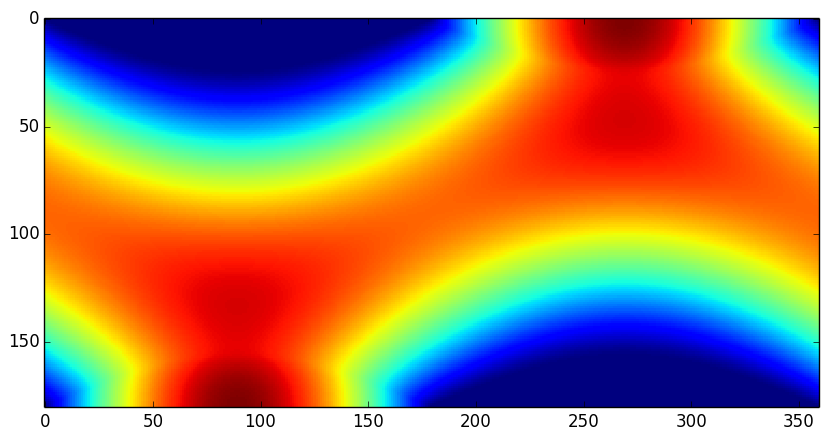

In [13]:
anima(J,"Milankovitch_precesion");
muestra_animacion("Milankovitch_precesion")

**[2]** Ahora se puede animar la oblicuidad en un ciclo de $-10\ 000$ a $10\ 000$ años, fijando la precesión: 

In [14]:
siglos = collect(-100:100)
K = zeros(181, 360, length(siglos))

for i in 1:length(siglos)
    
    t = i-101
    ϵ = (84381.448 - 46.815*t - (6e-4)*t^2 + (181e-5)t^3)/3600
    
    K[:,:,i] = Milankovitch(ϵ,90)
    
end

#K

 in depwarn at deprecated.jl:73
 in base64 at deprecated.jl:30
 in muestra_animacion at In[10]:18
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/claudiopierard/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/claudiopierard/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[13], in expression starting on line 2


<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQADYXFtZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0NiByMjU1NSAwYzIxNDgwIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAHHiZYiEABT//vfHT8Cm6Plmy51FPSEwitj6SCi9WOzQMnUAAAMAAAMAAAMAAAMBXA0eTU9KZyQ0JAAAAwAAuYAHwBz1hZbk5gJof+jux9U10MlWsh9klFeOEMtMF+BHHZ+K68N3gyMSX9csFQeIRbIe29YAjOE3hbi8u3FUKHBQW1Qwv59N5dMrRUzQrP7+y4C04/0fJ7CSodOCorW2snv/h2+9aTrxMjsWdIKbHL6Jt4kUawv1SazTwvYU58kvKxsOl3eBURq1GzraTvVqP1krggOYn5KWl4zDw+lGNOn5vKX0Mi08X1vL2UoSQ9bH1eH1FOy5b7nXkaJo70bO+FIIP4/Ks851I+0VvDpNF5RorC6p+ZtFIxYda0MN5846X7RFF51apiWK0dqPTVI5PwsjHMZvz7glAhDD5B44pNzHEapdEOPfrLiq/vREBiBxvZc7nLx0x4gwEVVajg+xypskEnsiY/SUAU07rFK5k8/Nmy8la7qpBnW/0cSvx5kTcnqQ7b6MqfHawPmQxnAElQULNEXu8Bb57XJYfIo6n9dHQsk8pGlUUHOHEHCBia4RaTU3PFdo7MBM0po5wpP+OK3mhb0eJTOBu1xaaDuaqVr0GvPt6Hh/wqPXDJ52tdigJCnW85P7VyMf2mTCPvlPe1BHsZdhQUSiX5tUjRr+ucNPh0E3Cvx+7XStUrBr1Wx9RixPKWmLBcIEko6XrULehWgtqbPAVe6B2MYbN8a4rPFEo3XdS4UsW/ojErC0E/wO1gu9Ncd6tpHJhkaXNyk5gG6uWImz1R3aiZ1PqTBf1ihtVUgo/0d5eLWkL9au2LpPcY99x4jw/XFoY415ckV3NQbAY6Go1f9ZQePnnQCeSH/KZklS5y4OnBF0hSZMMcfPnH0xCxtLRKWdb3cPnsgVw+p8+Ui1V5ebijNnSeusrTjo4y/xm6X5pxKT+EtqWdSXfitDwS2L9YFwT67fMQdep4erQWTSrmxhavnvwGlbjZCZv5K4JEZRnSWxRLh7vi4pz7q0czAehjBun6Ruau/yVtgifwYn868+FwI2ZwbUE/4O62WUEZyoWtNCPxO5TvArQNChCdVznxiW04aDfyUn6wCDdVinU6uDCcUuQpeSMKQ83EhpB/5f/CstkTQxVyQtwYwwqUR+IS8VJlzO8COosUpZHLohV45+NK9a9J3/KVAkJ0gi92PDIbVa8SB+p20qVR/30BCFRN/DR9BmqbfsF7xlY5KZWnaEuqf4EBBO/oXYBq9Hu/lG0gDcXdi4CE6ff6/yMEv65It5NA1hHwmhr/u3ImIsV/zWbslEbtQab24hwva3T7G8Fae3/MO+937oj5rDM0Z5YgJ3a1sYGikevPh4D/uqkgOeq26RS/8M7Peh2Xsv9qqVOXg4ySxZxhFqQJWcxJHIt0+z43GL2nqQiZa2m54/iX4KzqIDOba3818IeNPGe8ym4Kzjiha5DzmYLF+fU3fMqzdGa5HvTe2unsZYZBtYCZqjZzw8tPPLQwi/VMz0g64HkA77Hswp7uYjOsJgb/oTep6Px0QIbpY8tD6cwmMH5RsQx4NKvCERVJVxavAiEeOX+UBCFDwiK+4vft51/VSU+9OM1PpMHOpAgDvdQHbUnK2WHJjgfGrXETmpNsIjASOBquIGkyOt/j7aR5NdfCPZM8gkAz4kx3bFGBk/IXMUMC9O6hG672IqjEnqIjiIVM3zeyQiX3ubiy2Uuwxa1hdVX7D/n7H6LTYdg4n3+HX3aCZcv6GCG2YgUt2J3EJIM1IKsaylk9S8+hC5mCjK7CEQ4tBh2eNyULUb1r2FIXclC/xHw6rIUdvqkVQFVvMaSk1NTHngYWRKyRf9sKmbInPhbRE7QpAAwhqEHnh4W3md3lDDg2cDs+7yAn1/+D6oYDxg0vfUI0NmRTgWGXvDgVn5WlIftzRNWBdLFxzlqTM4xnKWMbboAD5cs3nh7zRu4zfRyw1kHVS4yUJDJRDO8Vhd9Zm20I24/3Ne/7O65vQXLnI0Ldltzw1tn3h3lWvN8qeBPC4iCvdoqNSDDKgsjLj+41ZekYSe8iEiD51NzYkEASK677vtSXTiK/BolToU0ENvHL7MGajE8kjF1Deoh+i2WOzuWd6yk07IqE0Wzw4AGWdGpzqkGs8LCYzE8DPVHFltsrp1XZ9rw86peWq7/LWfIDBcI2bEjuTjQfyuRzVREiDB4AfCS57gFJnw5gX9mf33ySV/+Ppc1Dj9ghnZKaJnKp+Z7tZjMFIfvtYM9Rd22ovQpLMNxD3bXliwqf2FcMkCIt2Hvcyjof6AR2z9U7tLrQWBAtWvOyokHsQC5TsFRHNJE9eS35EK2SQw9z6KDVOVkmi8fIKqMfiZyyah7Rn39c1Wc1aTsM5HybdapkYUeHgHFOLzAG5mQD4LC8VU3z577E+lNiXe6DssD/9qzI68pWib1Mst4Um/z4gfercSRJcOIgmFfmtWzprkC6IfxMIo3iTkpCCPSxCsPtZaNz0OCi3H0aQeTbXAC9tca+N0KhqcmrOGdf+vuuY9A2cEWGuCy7rgNFxFCNKgGuwiiapsNLjdswFprde6GJ481JK7cLonNVT9Osg3rtW9KryUKNjeu9ow7CFC5PKsv091EdoFnev+sTmLsl/c44e8PgdG1O4hjcw2FVKN75m2pELQkvWwsImsqRgn3Gu6Zhae/ABW3l2X3PT6r+gFVYfq5fsNUoK7aI8PjEFcvqXyiy8t57MqDgSbOqGZUzWL/S+mqZzG6JmuxvkmUimd5POp5+w6Z+DE7lTLfUzD5w1egq5yfp06JHyxw2HxjuHceOsh23fCZF4PsLLdiEebtBo9iiS4dwPxGADx1oACugNlsn64ECM/ZRmJarP2COLyYHt6AQVlxW4TzQSA6qge6FVAkHXKecpIa5zPtfG8EjRv+dd+lOiX/8nY+9SmF6LcsFlyJ6pYbFpQWS1cY2qyuACK6FPpjGJEd9b

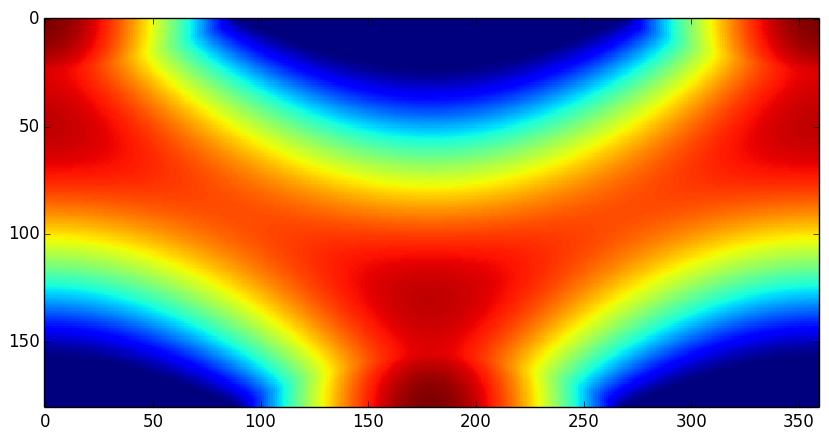

In [15]:
anima(K,"Milankovitch_oblicuidad");
muestra_animacion("Milankovitch_oblicuidad")

**[3]** Ahora usando la aproximación polinomial de orden $10$:

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAB1QxtZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0NiByMjU1NSAwYzIxNDgwIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAETrZYiEABP//vexj4FNyAANlzqKeh/hFbH0kFF6sdmgZOoAAAMAAAMAAAMAAAMCuBozYYClTkhoSAAAAwABcwAPgDHgKf9DgA6lqfquxEkV8CBe5E8SuLtnrpJgvvpKyvxSLhu8GRiS/rBgt1xCEXS23rAEZwm8LcXl24opVgKC2qGF/PpvLplaI28tWff2W3wxLSj5PYSVD0wVFa21k9/8O33rSd+nndizpBTY5fRNvCijWF+qTWaeF7CnBU15WNh0u7wKiMXn2ipYpxBUtEkE0h2bPfJaXjAmx9/G1QRpOziILLTuIQp29/DR/rW7Hv+BXFjC91HuRCYZhpvpkWCGSnwCNOdSP49OgvL5zC+LjSgtDfayMWd13ydblOOlG0RRehep67WQbRUNrQcH4WRemKWRdwROExh8M8cT7hs7CBc4OQ3qLeqYKKHhD+5+kbA2PC7p1UzMGt/pCpPTGyPKKqyihfcAlp3WKVvJp+bhl5Kz3VSDOt14BIRvdECHeZDtvKyn8dpr6i4gje6dZZMRP/T/KLfhRE6Z4lIkVzYCvTykaVQwhMxRUIGDdgfEOTtAV1rDJszCDGSkH/xxWTaMpCSUzgbtmexg7mp+W9B1X7m4KrsK91wtddrXYoCQp1vJz+1cjH9pkwj75T8tdSTGaYUFCJjWbVIza/rlPIfRQc2K8iu10rWKwa9K3VSvfiO1tm+2EOqUNL1KFvQrQW1Nj/6vdAbGLsm+NaVniiUbrvTFkkjfkRhVhWLP7MVk1L+iuI3UK3gb2agcLv5WIeoyx+PvuNXwBO/+3bZUpunZQ+bw4kIULwG1pL9D2j4eFETddDsT5Nlx115MBk1mfbVBpVAESnqgt9NG2lMC5hh/U6yaNJXmi1GqRr4fRn+FgRAXjt7HbzUTe58b96yQTXoyjoCDfeaT+oy0NPYFG1jfFDaHL8EEbZCY0iAzWiAsyR0jxJ4x0zTaEzhZ5D7dQQdQpVS+7ltFdzYFpHYt9UazSaNMjod+qfq5lTAAVpN8rveG8T6cSTiP08P5yEUOqwXdYRbwGUOQfdIL5+00NpT035PlSPe5N60C9b/4EEIWSN1YZR7w8VxOt8ee8Zm0NbD37VlZoVW/isfg0ar8S8E0hl0mExUX3IOKGpY4ez3CdxLy570+Nu6JHuN5w8AptNtLzCc7jqHHAgb8fH+fO7fL/OPgW9At+F+OeYrHjS1NnqzLe3nqO7sOr/2khoOpoHz05J6liuA6qJHWoGTejnyvL3MrLnFRj0LFxGC/+COiCDzkSVgMYSwIrmXutRiaOaHVC6M3vmND+NWhMYljRCUnwLzlwvjj5mUziWcSZQbVNFuv6jPjHBgN+HcUm+xUgV9uN/IgmaZUuG9pYVSi0geHhaJtYk8885nCVtPGU6MUMDh731X7bUcSHCFrDoYW9F1HuPhP0d3WD2C82Ppz1L5UK0n7SXQSMLYaEPNAtNj781OHmKIMj03ts2v9ne0a/nVp/UdsaFfoZXxFPV9GLIShS89TtZoU93MoWTaG5ZnwPFqUrGYCWljg4JSb39otN67yBwT//O2lFTvIi5FzYqwMNiboZNaf9z0sRrVTv4ojW9I/i4TRt/n8Kk9fsuAu+SB5AvuawP9rSyLN8zO7kFBB9NYOogX+PDvLgcqXCaodopy2BBcyVnLM+pOe/6tVm0IO8O363qGuaPl1VnoL4vRSv0yA6LPyJhGwC8ln7diEx5Lq+fD71hGAq2KzZIQJKhbKdXQO4KHbWZ0pdDKT8X/ErfUsA3zywi8dfcVGTcfEAihLQ3ggtKIJ+RKi5EVbhllyzdL2jQUO4c2eG/nTMBw6lzLJ489zPJnnzvqkKmOdJ5cOD3KVzI6OMl/mRFXCenHFkgDZW/UMKsE8mQhg/7i9jXtyXn+Fg2Zd8e3NN1JpjTThtf3IKb5ZwHguSroACO8IKcOWtVrsVfgSF+o6bjC/Zsv/j3NllboLSGVRDqgR3LgtZsDkCF4jfP2rdxxC/QYxWGnrBUQ7HLGQ/cxj5e8wFVCYmKzrwgNoUbs8WnAMjtAmhsHk9zWWRbrCE2M047XnR035CjVhMgpT40MrKsbe9vioSFDiZ1YrWp75cuYOt+4VcLtT2zuVBas5FjTqzWsRuVulGBCqWJaoUhQURrK6z9j4UfVjx9qr1YivUNUn+9mjbVU3A0tuADJCUF8dc9IiY2JyPzDoJVJm5ay2Y8kNxrpbvaQrktjLxz0E9/+gW4XO1iLVKXsme+ULYDpvqIatMvDwjEIqubzwg3rsd7K32XQrpsI73BFi3BWOslEiHnS1l6zXaZw1hMFLq9IrxmazVpiQ8w/1YUAS7En7W1VwTdbGj0Q75G+EmN1CqnUzrrl729yfxo6DcofNQbbegivm+bxMaxS5AhHrZR/gOfiNbKyxVVppTM/Di5S4raKX1XGRuoWSf2mbVnpRjVAURaq2VoRwVMJ+F8AwQYXA6cVdh1x1olxG2m9qI5r6Y8bkdlbIugdpcdmFnWWa+NS0rSYHieQK4pLnjL9avXkS2o4TFBbqMzFB0viJ1jLuN0e0edKOg78N5Ws2OIEkr+OQwMKW+jb98ypnKKWsYpyt9USwkc+HXSwQ9DjuL5CWsMynTxyeXDLkwYvWSq0eI+/HtxatwxySQnqS+Zt3/ywYSGvAX0JHym2t88b0DzJU9WJv9VF5myY0f1TOAq2WFaj1y/vSnIRqgcxZ61JF2RqFQD3gZjhDlhy+5yd4jwZVZrQMhIzJG4+evpeHCPdADdGOnbG+PxLeClzlIEbW3tQptGofl+iINKFlKrcHB+5+9dXo+HRSwGlyteCljTqucxXm4Hdm+2RNgqNl6usv0V8lr8Y9TWX0T+Wp006TjifjA1qXNhlvbP4fiEcJ03Xwv0xVQiH593ibEjgG9dlnTIGzN/7TlhaG5SLpN+nl/70JeLzWpuSJjmymLHq7NbhnSjQ6tn7NPtJuZ9OvHqz

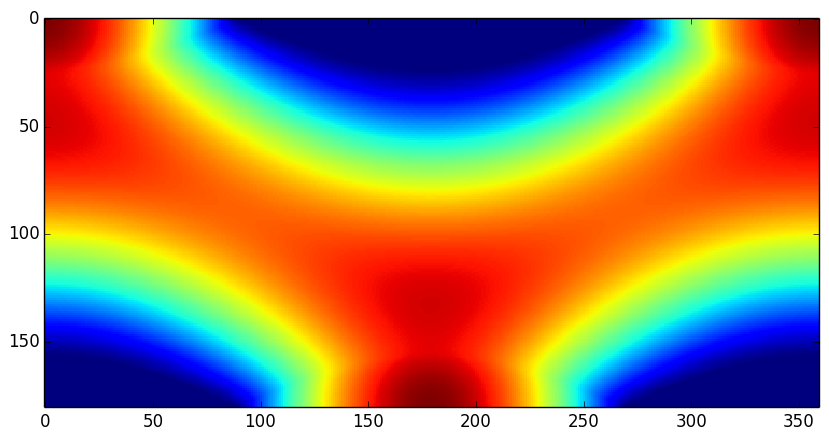

In [16]:
decadas = collect(-2.1:0.001:1.9-0.001)
L = zeros(181, 360, length(decadas))

for i in 1:length(decadas)
    
    t = i*0.001 -2.1 - 0.001
    
    ϵ = (84381.448 - 46.815*t - (6e-4)*t^2 + (181e-5)t^3 - 51.38t^4 - 249.67t^5 
    - 39.05t^6 + 7.12t^7 + 27.87t^8 + 5.79t^9 + 2.45t^10) /3600
    
    L[:,:,i] = Milankovitch(ϵ,90)
    
end

anima_paso_50(L,"Milankovitch_oblicuidad_o10");
muestra_animacion("Milankovitch_oblicuidad_o10")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQACB0ltZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0NiByMjU1NSAwYzIxNDgwIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAEuDZYiEABT//vfHT8Cm6Plmy51FPSEwitj6SCi9WOzQMnUAAAMAAAMAAAMAAAMBXA0eTU9KZyQ0JAAAAwAAuYAHwBz1hZbk5gJof+jux9U10MlWsh9klFeOEMtMF+BHHZ+K68N3gyMSX9csFQeIRbIe29YAjOE3hbi8u3FUKHBQW1Qwv59N5dMrRUzQrP7+y4C04/0fJ7CSodOCorW2snv/h2+9aTrxMjsWdIKbHL6Jt4kUawv1SazTwvYU58kvKxsOl3eBURq1GzraTvVqP1krggOYn5KWl4zDw+lGNOn5vKX0Mi08X1vL2UoSQ9bH1eH1FOy5b7nXkaJo70bO+FIIP4/Ks851I+0VvDpNF5RorC6p+ZtFIxYda0MN5846X7RFF51apiWK0dqPTVI5PwsjHMZvz7glAhDD5B44pNzHEapdEOPfrLiq/vREBiBxvZc7nLx0x4gwEVVajg+xypskEnsiY/SUAU07rFK5k8/Nmy8la7qpBnW/0cSvx5kTcnqQ7b6MqfHawPmQxnAElQULNEXu8Bb57XJYfIo6n9dHQsk8pGlUUHOHEHCBia4RaTU3PFdo7MBM0po5wpP+OK3mhb0eJTOBu1xaaDuaqVr0GvPt6Hh/wqPXDJ52tdigJCnW85P7VyMf2mTCPvlPe1BHsZdhQUSiX5tUjRr+ucNPh0E3Cvx+7XStUrBr1Wx9RixPKWmLBcIEko6XrULehWgtqbPAVe6B2MYbN8a4rPFEo3XdS4UsW/ojErC0E/wO1gu9Ncd6tpD+G/oH/vkwaNjYR1/NnkoJTOp9SYL6BFNqqkFIY/RWi1PQv1rGYulK88aWrW2/9p2x6kRuHghyPWJaaaM7/Ij6fcKPqjjR5hXvxZT7eLu0n9GTKNlSKZDI1YqPLzDtqQ2a8Ae1BcJG8N1d8Yjfk9mQWoa8T8bpIkllyKg04I/jlNkjFjqeRW/zX97ztyGAO6JVCjPPeD437QcxD/07DkqSwn4fqccHqXFuYnd0Gibt/eQoZ4ZuT4Uejmvm3oYGu2LS63Ib8dSbuXLcnyI9RMSfter6d8vE1weyxnFQMr9kqmpC6/zkQ8q1MipZidGf4osjbtc368zqmxgelDHRyxY4zqOLOuNiz1V/SY1fw0QomM0Tk0rA4fKhZR8qNAeoVVzFf0orwphlTMORRH58sFiduUZlx90/E0rEF4PPdnUCbX91bMbic771QAp2Dabj8mGjDy1Datb/8TZXM4/ZvrGNopFJrylZvSw4WVxA8TJH2SE2BhSeNRSxsWeFxmmAUu2Qr7ZNytU7KP2unDQTltT8E7qYsqfTpZY38WrhMbdLoUvOi5XmG1YKRvjpKAW+aMNHH9Mm2O6uxagtnQ4+4B6F1zcMcVLleg+SPk1hh7AR9TwJXt7+lufjQ7bMp6huq2hj73HYy9n+5rLn2+E+SNdjhP16iSwcNi1d93dOJtY1noxHG68A/raFjjysiX+vLH1gwQdJwNOQ4gVdPoOZCDbQ+wAnIrXMCElokgjH+UG9DpjdbbqQmG4BnWjasq+6isCJIDWKTp4B8FanvZxn5G835DqFrtiecof0PAZfs3J4yr654tcTznLOFLswqknoMrYN16YbwVPUmBxxJbzvPqZnoBcwcrUth+P48CxW4RJKcwylvlW+3Xlo6fHJb7onIlXDDvVjFAtmJILeee9mtLxJGOgDFi0s9qZAG81CWCEbaBZKOl6z+XyoFZ9aZfTa4KTN7Cgivb/NA92z1o6bxif33PG/w0Jy1/XO+O/DbE823S4e8QDv/2Zb4mih0dRguGoynCLQDSqSkpuDhzZdrFF5M1BvaPeioxi7dB9OEUexglZVIh7vN4y2V/cYiMZlvsaPsUgt2sVIb7ZvlVSL2UNXMquL0G09cV/SFs82so2B/Wygmcz86vEo91yga8Vx2UQBzgxuqlQyAGWOeWUOfTdZbDQH4OXH5gzPMu5dAc4Uf2QIaDV4fhYGJR6etCSoex0I0evZhKLcqFSse+v9IVjurQscQABW+w4PG+NjALn9OqeZ+yzIs98nbKO6K8VztBfzukJLsZ+COZcC36y+pu+vVUndsIJDn+CTSQsvr95roYv8BCiXrkv1zAC2/RQ/q202pZudzmEgddvTBbIwZPfMTry76bgXWjoUfMVAdpJRnODIRJYIu3TO1kTx0jgIwvS42Pqy/ZPltIDbg21AMVDgeicG+lPurgoXFNG14IJ5me1IBhs5nySnS8OOj7V+fembtc39YYXciDFfwFSyySjCP5Ex4xXrnTHM1RNMmThndjBTMOCcG90g7I3jB/o4UjVP/OG0m9eg6PD/yA8MLGhiwa/EXgQSnsy27d99WF9nboy/rQu6b+MCSuL3lLvWSWJpwHLsSFN8urN4cYybhoeJ8I/COVuJ3hVP2J3KtA93TcFG9Pvs/6cAlJTYy9ik1HYvAB+g5XkVswhDHbPsWOl6k/naFUyY4AcMJVoOTg3TdBsllqgzBr8Bq9xPJkRCYeSgSkdMNwVLQEV+ZMAZJFCSmlApX/16NIgY/ocGB2UzJoHfZ9CbHyT+3t5tLIhWJwLV6tqBqEQJn/TUPQleAT5+xqh1Lj8G/9h2vFOOanbVXj6odmkJmeeoxkNDGghVi52kbHOPEYJ/iEy0cBaekT5XEOqYDcyArTi5Hox8V6e4zXlvyT4hFHuABo9U+AdrlRRE+GqxatgPPkAMI3HBjHtftmIUv9Vw502kfKvWNzBIJMX66nliW9l2hoJTJs0JXaV8rJUtIMjZN0YeyU0l5LDKmvAJ8D2/73BKbHkllt1m8mNbReo8qFFzYTpe+YWliIE9kSoHDiKPfFKrczQIz9iModNti4M413Uob3jouwjoQBuJNNMb8qr0rfNgycRjRgm73lMnGHmr3gNSdW4wH4iE3wHgzMX79eFqky3tt7Rv+FQ7qUsficixVa7PuXQmWHIWwSLF5Cw/QgMapUzaUPUwhDo

 in depwarn at deprecated.jl:73
 in base64 at deprecated.jl:30
 in muestra_animacion at In[10]:18
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/claudiopierard/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/claudiopierard/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[15], in expression starting on line 2


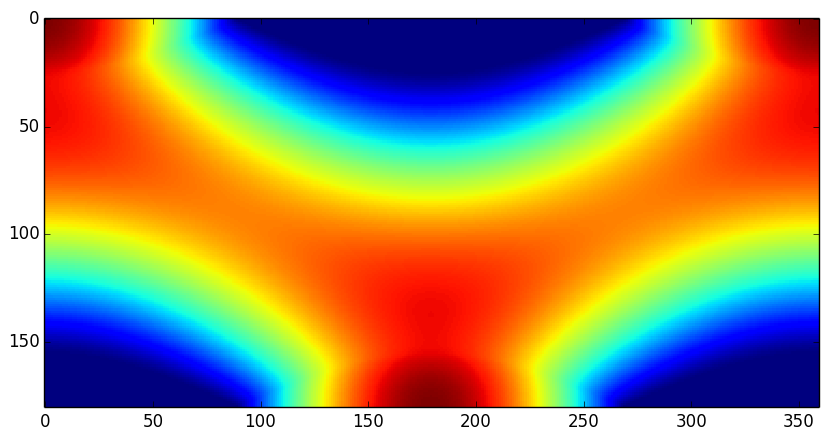

In [17]:
decadas = collect(-2.1:0.001:1.9-0.001)
M = zeros(181, 360, length(decadas))

for i in 1:length(decadas)
    
    t = i*0.001 -2.1 - 0.001

    ϵ = (84381.448 - 4680.93*t - (1.55)*t^2 + (1999.25)t^3 - 51.38t^4 - 249.67t^5 
    - 39.05*t^6 + 7.12*t^7 + 27.87*t^8 + 5.79*t^9 + 2.45*t^10) /3600
    
    M[:,:,i] = Milankovitch(ϵ,90)
    
end

anima_paso_50(M,"Milankovitch_oblicuidad_o10_julio");
muestra_animacion("Milankovitch_oblicuidad_o10_julio")
